In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
def plot_density_log_scale(data: list[int]):
    # Set the style of seaborn
    sns.set(style="whitegrid")

    # Create a density plot
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data, log_scale=True)

    plt.xlabel('Value (log scale)')
    plt.title('Density Plot on Log Scale')
    plt.show()

def count_s(filename):
    ns = 0
    with open(filename, "r") as fp:
        for line in fp:
            ns += int(line)
    return ns/1000000000

def load_file_to_int(filename):
    with open(filename, "r") as fp:
        return [int(x) for x in fp.readlines()]

def count_numbers(filename):
    with open(filename, "r") as fp:
        return len(fp.readlines())

In [2]:
#print(count_s("./jitter_baseline/results/1/output_size_1_rank_0.txt"))
#print(count_s("./jitter/results/1/output_size_1_rank_0.txt"))
#print(count_s("./jitter/results/8/output_size_8_rank_0.txt"))

In [3]:
#print(count_numbers("./jitter_baseline/results/1/output_size_1_rank_0.txt"))
#print(count_numbers("./jitter/results/1/output_size_1_rank_0.txt"))
#print(count_numbers("./jitter/results/8/output_size_8_rank_0.txt"))

In [4]:
jitter = load_file_to_int("./jitter/results/8/output_size_8_rank_0.txt")
#print(np.percentile(jitter, 50))
#print(np.percentile(jitter, 90))
#print(np.percentile(jitter, 99))
#print(np.percentile(jitter, 99.9))

In [5]:
baseline = load_file_to_int("./jitter_baseline/results/8/output_size_8_rank_0.txt")
#print(np.percentile(baseline, 50))
#print(np.percentile(baseline, 90))
#print(np.percentile(baseline, 99))
#print(np.percentile(baseline, 99.9))

In [6]:
def plot_histogram_with_numpy(data, show_cnt = False, title = None, bins=10):
    """
    Plot a histogram using numpy.histogram() and matplotlib.pyplot.bar().
    
    Parameters:
    - data: array-like, the data to plot.
    - bins: int, the number of bins to use for the histogram.
    """
    # Compute the histogram
    counts, bin_edges = np.histogram(data, bins=bins)
    print(f"counts: {counts}")
    print(f"bin edges: {bin_edges}")

    # Calculate bin widths
    bin_widths = np.diff(bin_edges)

    # Plot the histogram
    bars = plt.bar(bin_edges[:-1], counts, width=bin_widths, edgecolor='black')
    plt.xlabel('Deltas')
    plt.ylabel('Frequency')
    if title is not None:
        plt.title(title)
    plt.yscale('log')

    if show_cnt:
        for bar, count in zip(bars, counts):
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{count}', ha='center', va='bottom')
    
    plt.show()
    return counts, bin_edges


In [7]:
# Decision:
# - Square-root choice: trivial
# - sturges Formula: easy and often used, but normally for normal distributed data...
# - rice rule: could overestimate the number of needed bins but many bins are good for tails
# - freedman-diaconis: useful for long tail because it looks at the IQR AND the number of pts.


def calculate_bins_square_root(data):
    """Calculate the number of bins using the Square-root choice."""
    N = len(data)
    return int(np.sqrt(N))

def calculate_bins_sturges(data):
    """Calculate the number of bins using Sturges' formula."""
    N = len(data)
    return int(np.log2(N)) + 1

def calculate_bins_rice_rule(data):
    """Calculate the number of bins using Rice Rule."""
    N = len(data)
    return int(2 * (N ** (1/3)))

counts: [134217700        20         4         2         1         0         0
         0         0         1]
bin edges: [1.400000e+01 4.276660e+04 8.551920e+04 1.282718e+05 1.710244e+05
 2.137770e+05 2.565296e+05 2.992822e+05 3.420348e+05 3.847874e+05
 4.275400e+05]


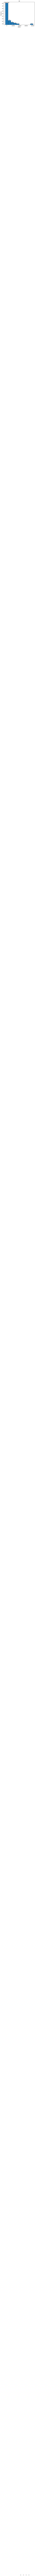

In [8]:
hist, bin_edges = plot_histogram_with_numpy(
    jitter, 
    bins=10,
    show_cnt=True,
    title="10"
)

counts: [134217069       589        53         7         2         2         2
         1         1         0         1         0         0         0
         0         0         0         0         0         0         0
         0         0         0         1]
bin edges: [1.4000000e+01 1.7115040e+04 3.4216080e+04 5.1317120e+04 6.8418160e+04
 8.5519200e+04 1.0262024e+05 1.1972128e+05 1.3682232e+05 1.5392336e+05
 1.7102440e+05 1.8812544e+05 2.0522648e+05 2.2232752e+05 2.3942856e+05
 2.5652960e+05 2.7363064e+05 2.9073168e+05 3.0783272e+05 3.2493376e+05
 3.4203480e+05 3.5913584e+05 3.7623688e+05 3.9333792e+05 4.1043896e+05
 4.2754000e+05]


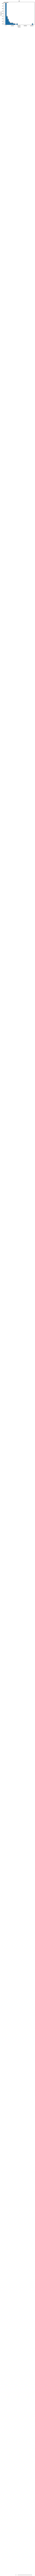

In [9]:
hist, bin_edges = plot_histogram_with_numpy(
    jitter, 
    bins=25,
    show_cnt=True,
    title="25"
)

counts: [134215397      1672       463       126        42        11         4
         3         2         0         2         0         2         0
         0         1         0         1         0         0         1
         0         0         0         0         0         0         0
         0         0         0         0         0         0         0
         0         0         0         0         0         0         0
         0         0         0         0         0         0         0
         1]
bin edges: [1.4000000e+01 8.5645200e+03 1.7115040e+04 2.5665560e+04 3.4216080e+04
 4.2766600e+04 5.1317120e+04 5.9867640e+04 6.8418160e+04 7.6968680e+04
 8.5519200e+04 9.4069720e+04 1.0262024e+05 1.1117076e+05 1.1972128e+05
 1.2827180e+05 1.3682232e+05 1.4537284e+05 1.5392336e+05 1.6247388e+05
 1.7102440e+05 1.7957492e+05 1.8812544e+05 1.9667596e+05 2.0522648e+05
 2.1377700e+05 2.2232752e+05 2.3087804e+05 2.3942856e+05 2.4797908e+05
 2.5652960e+05 2.6508012e+05 2.7363064e+05 2.8

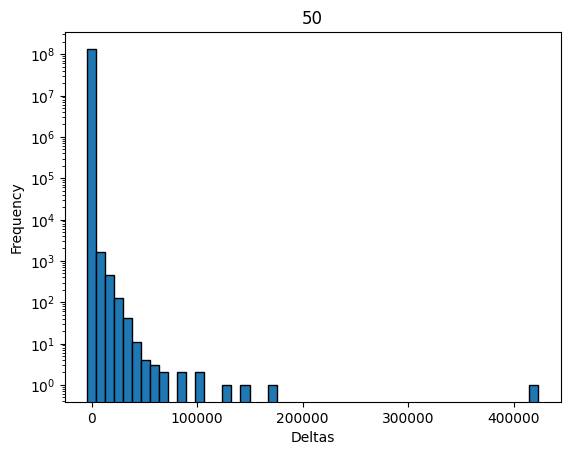

In [10]:
hist, bin_edges = plot_histogram_with_numpy(
    jitter, 
    bins=50,
    title="50"
)

counts: [134200727     14670       686       986       336       127        79
        47        27        15         5         6         3         1
         0         3         1         1         0         0         2
         0         0         0         0         2         0         0
         0         0         0         1         0         0         0
         1         0         0         0         0         1         0
         0         0         0         0         0         0         0
         0         0         0         0         0         0         0
         0         0         0         0         0         0         0
         0         0         0         0         0         0         0
         0         0         0         0         0         0         0
         0         0         0         0         0         0         0
         0         0         0         0         0         0         0
         0         0         0         0         0         0         

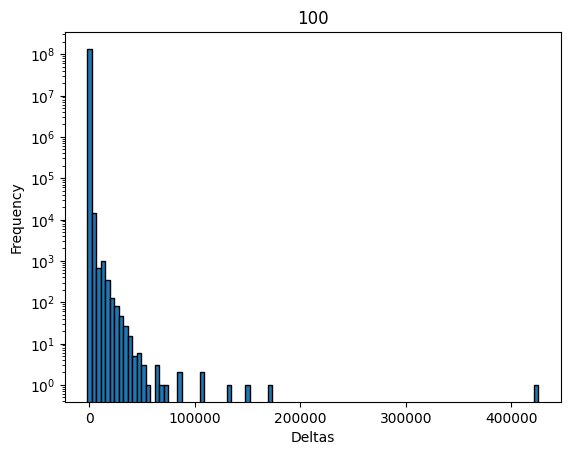

In [11]:
hist, bin_edges = plot_histogram_with_numpy(
    jitter, 
    bins=100,
    title="100"
)

counts: [134022764    175286     14218      2931       198       148       242
       578       467       237       191        99        77        51
        45        38        29        18        30        11        13
        13         5         7         4         3         1         2
         3         2         1         1         1         1         0
         0         0         1         2         0         1         0
         0         0         1         0         0         0         0
         0         0         2         0         0         0         0
         0         0         0         0         0         0         1
         1         0         0         0         0         0         0
         0         0         0         0         0         0         0
         0         0         1         0         0         0         0
         0         0         0         0         0         1         0
         0         0         0         0         0         0         

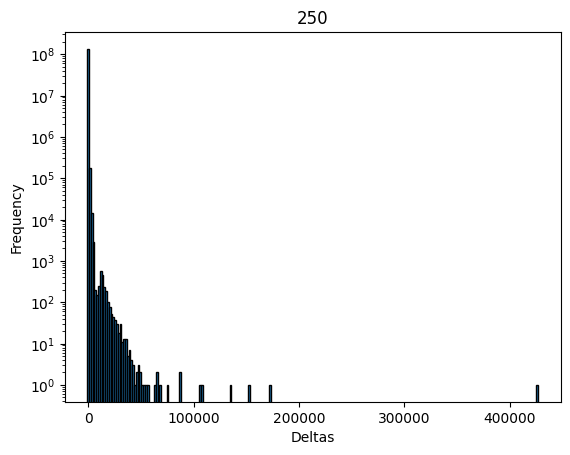

In [12]:
hist, bin_edges = plot_histogram_with_numpy(
    jitter, 
    bins=250,
    title="250"
)    

counts: [132106983   1704772     34009 ...         0         0         1]
bin edges: [1.40000000e+01 5.09034096e+01 8.78068192e+01 ... 4.27466193e+05
 4.27503097e+05 4.27540000e+05]


Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7ff88fcd2200>>
Traceback (most recent call last):
  File "/home/lquenti/jitter-analysis/venv/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 770, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


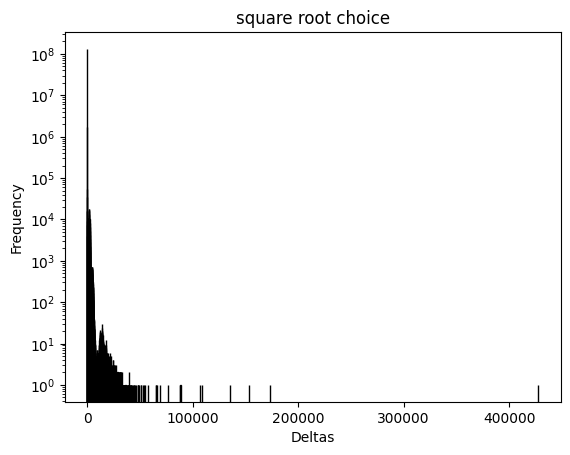

In [13]:
hist, bin_edges = plot_histogram_with_numpy(
    jitter, 
    bins=calculate_bins_square_root(jitter),
    title="square root choice"
)

counts: [134216813       803        88        11         4         3         0
         2         1         0         1         1         0         0
         0         0         0         0         0         0         0
         0         0         0         0         0         0         1]
bin edges: [1.40000000e+01 1.52827857e+04 3.05515714e+04 4.58203571e+04
 6.10891429e+04 7.63579286e+04 9.16267143e+04 1.06895500e+05
 1.22164286e+05 1.37433071e+05 1.52701857e+05 1.67970643e+05
 1.83239429e+05 1.98508214e+05 2.13777000e+05 2.29045786e+05
 2.44314571e+05 2.59583357e+05 2.74852143e+05 2.90120929e+05
 3.05389714e+05 3.20658500e+05 3.35927286e+05 3.51196071e+05
 3.66464857e+05 3.81733643e+05 3.97002429e+05 4.12271214e+05
 4.27540000e+05]


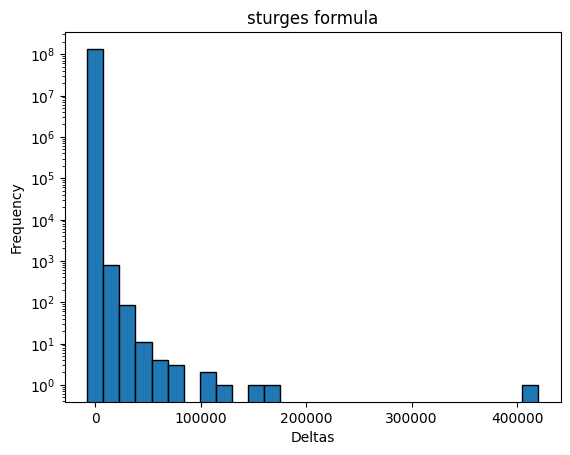

In [14]:
hist, bin_edges = plot_histogram_with_numpy(
    jitter, 
    bins=calculate_bins_sturges(jitter),
    title="sturges formula"
)

counts: [133952399      1195     40209 ...         0         0         1]
bin edges: [1.40000000e+01 4.31913978e+02 8.49827957e+02 ... 4.26704172e+05
 4.27122086e+05 4.27540000e+05]


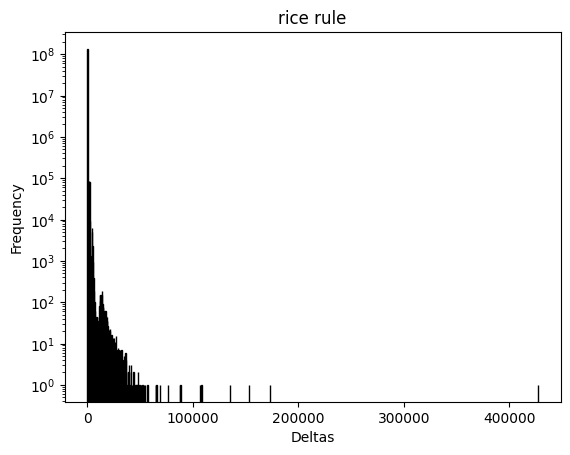

In [15]:
hist, bin_edges = plot_histogram_with_numpy(
    jitter, 
    bins=calculate_bins_rice_rule(jitter),
    title="rice rule"
)